In [1]:
labels = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']

In [71]:
labels_nr = [[1., 0., 0., 0., 0., 0., 0.], [0., 1., 0., 0., 0., 0., 0.], [0., 0., 1., 0., 0., 0., 0.], [0., 0., 0., 1., 0., 0., 0.], [0., 0., 0., 0., 1., 0., 0.], [0., 0., 0., 0., 0., 1., 0.], [0., 0., 0., 0., 0., 0., 1.]]

In [42]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

In [18]:
with open('data.pickle', 'rb') as file:
    data = pickle.load(file, encoding='bytes')

In [22]:
data.keys()

dict_keys([b'info', b'texts', b'val_ind', b'test_ind', b'train_ind'])

In [40]:
data[b'info'][0]

{b'label': array([1., 0., 0., 0., 0., 0., 0.])}

## Split data info training and test sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data[b'texts'], data[b'info'], test_size=0.2, random_state=42, shuffle=True)

In [74]:
X_test

['When I was walking along a road alone on my way to go shopping.',
 'When I found my baby whipped by my Auntie. I was really sad and up to this moment my sadness is still on.',
 'A certain boy came into my room and started telling me that I was not pretty, that I had no manners and that I should learn some.  I had just come to campus and he was in fourth year.',
 'I was once chatting with friends. Then some boys came and joined us. These boys took all my 3 friends away and I was left alone in shame without knowing where to go from there.',
 'The loss of my mother.',
 'When I saw a car run over a child, out of carelessness.',
 'Receiving a letter from a boy I care.',
 'I was teaching someone to drive and when we were about to crash I was scared.',
 'When my sister became pregnant at UNZA last year.',
 'My boyfriend returned after a long absence.',
 'When my friend, after a beer spree vomitted in my sitting room.',
 'I am a school teacher.  One of the classes does not obey me at all, ke

## Build words representation

In [104]:
import bcolz

In [105]:
words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=f'representation/vectors.6B.50d.dat', mode='w')

In [106]:
vectors

carray((1,), float64)
  nbytes := 8; cbytes := 16.00 KB; ratio: 0.00
  cparams := cparams(clevel=5, shuffle=1, cname='lz4', quantize=0)
  chunklen := 2048; chunksize: 16384; blocksize: 0
  rootdir := 'representation/vectors.6B.50d.dat'
  mode    := 'w'
[ 0.]

In [107]:
with open(f'glove.6B/glove.6B.50d.txt', 'rb') as file:
    for l in file:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)

In [108]:
vectors.shape

(20000001,)

In [113]:
vectors

carray((20000001,), float64)
  nbytes := 152.59 MB; cbytes := 145.66 MB; ratio: 1.05
  cparams := cparams(clevel=5, shuffle=1, cname='lz4', quantize=0)
  chunklen := 2048; chunksize: 16384; blocksize: 16384
  rootdir := 'representation/vectors.6B.50d.dat'
  mode    := 'w'
[ 0.       0.418    0.24968 ..., -0.18907 -0.59021  0.55559]

In [110]:
len(words)

400000

In [111]:
words

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

In [112]:
word2idx

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [114]:
vectors = bcolz.carray(vectors[1:].reshape((400000, 50)), rootdir=f'representation/vectors.6B.50d.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'representation/6B.50_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'representation/6B.50_idx.pkl', 'wb'))

In [115]:
vectors = bcolz.open(f'representation/vectors.6B.50d.dat')[:]
words = pickle.load(open(f'representation/6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open(f'representation/6B.50_idx.pkl', 'rb'))

In [118]:
word_representation = {w: vectors[word2idx[w]] for w in words}

In [197]:
word_representation['mother']

array([ 0.4336   ,  1.0727   , -0.6196   , -0.80679  ,  1.2519   ,
        1.3767   , -0.93533  ,  0.76088  , -0.0056654, -0.063649 ,
        0.30297  ,  0.52401  ,  0.2843   , -0.38162  ,  0.98797  ,
        0.093184 , -1.1464   ,  0.070523 ,  0.58012  ,  0.50644  ,
       -0.24026  ,  1.7344   ,  0.020735 ,  0.43704  ,  1.2148   ,
       -2.2483   , -0.41168  , -0.24922  ,  0.31225  , -0.49464  ,
        2.0441   , -0.012111 , -0.19556  ,  0.085665 ,  0.27682  ,
        0.015702 ,  0.0067683,  0.12759  ,  0.87008  , -0.40641  ,
       -0.21057  ,  0.41651  , -0.021812 , -0.53649  ,  0.54095  ,
       -0.43442  , -0.52489  , -2.0277   ,  0.13136  ,  0.11704  ])

# Prepare sentenses

In [200]:
X_train = [sentense.lower() for sentense in X_train]
X_test = [sentense.lower() for sentense in X_test]

In [205]:
[word for word in re.findall(r"[\w']+", zdanie) if word in word_representation]

['the', 'loss', 'of', 'a', 'cat']

In [202]:
import re

def sentense2vec(sentense, word_vectors):
    return [word_vectors[word] for word in re.findall(r"[\w']+", sentense) if word in word_vectors]

In [288]:
def all_sentenses2vec(sentenses, words_vectors):
    vectors = []
    for sentense in sentenses:
        vec = sentense2vec(sentense, words_vectors)
        vectors.append(np.mean(vec, axis=0)) # mean in row
    
    return np.array(vectors)

In [289]:
X_train_vec = all_sentenses2vec(X_train, word_representation)
X_test_vec = all_sentenses2vec(X_test, word_representation)

In [291]:
X_test_vec.shape

(1496, 50)

In [292]:
X_test_vec[0]

array([ 0.33537771,  0.25872621,  0.00981214, -0.27001843,  0.38873793,
       -0.07669809, -0.74221   ,  0.0180432 , -0.03376521, -0.17736531,
       -0.26559429, -0.03830857, -0.56578236, -0.15475079,  0.414065  ,
        0.26829157,  0.05287007,  0.05832586, -0.38369064, -0.32233279,
        0.14331407,  0.41728621,  0.06083007,  0.22423047,  0.44046743,
       -1.72906286, -0.21833571,  0.3582955 ,  0.572603  , -0.586945  ,
        3.27764286,  0.31255286, -0.31305237, -0.04165864,  0.11666537,
       -0.01052007,  0.21357929,  0.2523925 ,  0.09946629, -0.03619279,
       -0.24942724,  0.01596114, -0.17119793,  0.11638956, -0.10961743,
       -0.055166  , -0.00384521, -0.61280779,  0.16766229, -0.02172086])

# Neural network

In [256]:
import tensorflow as tf

C:\Users\Patrycja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [521]:
tf.set_random_seed(0)
VEC_ROWS = 50

tf.reset_default_graph() # clear variables to simplify variables names

# placeholders for input data
X = tf.placeholder(tf.float32, [None, VEC_ROWS])
Y_true = tf.placeholder(tf.float32, [None, len(labels)])

# size of layers
L1, L2, L3, L4, L5 = 200, 100, 100, 50, len(labels)

# parameters
W1 = tf.Variable(tf.truncated_normal([VEC_ROWS, L1], stddev=0.1), name='W1')
b1 = tf.Variable(tf.zeros([L1]), name='b1')

W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1), name='W2')
b2 = tf.Variable(tf.zeros([L2]), name='b2')

#W3 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1), name='W3')
#b3 = tf.Variable(tf.zeros([L3]), name='b3')

# W4 = tf.Variable(tf.truncated_normal([L3, L4], stddev=0.1), name='W4')
# b4 = tf.Variable(tf.zeros([L4]), name='b4')

W5 = tf.Variable(tf.truncated_normal([L2, L5], stddev=0.1), name='W5')
b5 = tf.Variable(tf.zeros([L5]), name='b5')

#dropout regularization coef
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')

# outputs from layers
Y1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
#Y1 = tf.nn.sigmoid(tf.add(tf.matmul(X_flat, W1), b1))
Y1 = tf.nn.dropout(Y1, keep_prob)

Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y2 = tf.nn.dropout(Y2, keep_prob)

#Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
# Y3 = tf.nn.dropout(Y3, keep_prob)

# Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
# Y4 = tf.nn.dropout(Y4, keep_prob)

Y_last = tf.add(tf.matmul(Y2, W5), b5)

## loss function

In [522]:
loss_function = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y_last, labels=Y_true)
loss_function = tf.reduce_mean(loss_function)

## L2

In [523]:
beta = 0.1
regularizers = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W5)
loss = tf.reduce_mean(loss_function + beta * regularizers)

## Prediction

In [524]:
Y_normalized = tf.nn.softmax(Y_last)
predictions = tf.equal(tf.argmax(Y_true, 1), tf.argmax(Y_normalized, 1))
accuracy = tf.reduce_mean(tf.cast(predictions, tf.float32))

predicted_labels = tf.argmax(Y_normalized, 1)

## Optimization

In [525]:
learning_coef = 0.001
optimizer = tf.train.AdamOptimizer(learning_coef).minimize(loss_function)
#optimizer = tf.train.GradientDescentOptimizer(learning_coef).minimize(loss_function)

## Check model parameters

In [526]:
tf.trainable_variables()

[<tf.Variable 'W1:0' shape=(50, 200) dtype=float32_ref>,
 <tf.Variable 'b1:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'W2:0' shape=(200, 100) dtype=float32_ref>,
 <tf.Variable 'b2:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'W5:0' shape=(100, 7) dtype=float32_ref>,
 <tf.Variable 'b5:0' shape=(7,) dtype=float32_ref>]

## Mini-batch functions

In [350]:
def next_batch_v2(num, batches, X, Y, mini_batch_size):
    if num >= len(batches):
        batches = random_mini_batches(X, Y, mini_batch_size=mini_batch_size, seed=num)
        
    return batches, batches[num%len(batches)][0], np.reshape(batches[num%len(batches)][1],(batches[num%len(batches)][1].shape[0], 7))

In [299]:
X_train_vec.shape

(5984, 50)

In [344]:
Y_train_org = y_train
Y_test_org = y_test

In [345]:
Y_train = np.array([ y[b'label'] for y in Y_train_org])
Y_test = np.array([ y[b'label'] for y in Y_test_org])

In [347]:
Y_train.shape

(5984, 7)

In [348]:
import math

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):   
    np.random.seed(seed)            
    m = X.shape[0] # number of training examples
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, : ].reshape((m,7))
    
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[mini_batch_size*k:mini_batch_size*(k+1),:]
        mini_batch_Y = shuffled_Y[mini_batch_size*k:mini_batch_size*(k+1),:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[mini_batch_size * num_complete_minibatches:,:]
        mini_batch_Y = shuffled_Y[mini_batch_size * num_complete_minibatches:,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

## Run

In [588]:
init = tf.global_variables_initializer()

train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

DISPLAY_STEP = 4
EPOCHS = 500
BATCH_SIZE = 300
keep = 0.8

with tf.Session() as sess:
    sess.run(init)
    
    #create first set of mini-batches
    mini_batches = random_mini_batches(X_train_vec, Y_train, mini_batch_size = BATCH_SIZE, seed = 0)
    
    for i in range(EPOCHS):
        mini_batches, batch_X, batch_Y = next_batch_v2(i, mini_batches, X_train_vec, Y_train, BATCH_SIZE)
        
        sess.run(optimizer, feed_dict={X: batch_X, Y_true: batch_Y, keep_prob: keep})
        
        if i % DISPLAY_STEP == 0:
            acc_train, loss_train = sess.run([accuracy, loss_function], feed_dict={X: batch_X, Y_true: batch_Y, keep_prob: 1})
            acc_test, loss_test = sess.run([accuracy, loss_function], feed_dict={X: X_test_vec, Y_true: Y_test, keep_prob: 1})

            print("#{} Train loss={}, Train acc={} , Test loss={}, Test acc={}".format(i,loss_train,acc_train, loss_test, acc_test))

            train_losses.append(loss_train)
            train_accuracies.append(acc_train)
            test_losses.append(loss_test)
            test_accuracies.append(acc_test)
     
    # prepare data for confusion matrix
    pred_labels = sess.run([predicted_labels], feed_dict={X: X_test_vec, Y_true: Y_test, keep_prob: 1})

#0 Train loss=1.943501353263855, Train acc=0.1666666716337204 , Test loss=1.9478291273117065, Test acc=0.14839571714401245
#4 Train loss=1.9230951070785522, Train acc=0.23000000417232513 , Test loss=1.935534954071045, Test acc=0.1978609561920166
#8 Train loss=1.9190881252288818, Train acc=0.2199999988079071 , Test loss=1.9223142862319946, Test acc=0.2179144322872162
#12 Train loss=1.9078587293624878, Train acc=0.28333333134651184 , Test loss=1.9113717079162598, Test acc=0.27941176295280457
#16 Train loss=1.9023820161819458, Train acc=0.25333333015441895 , Test loss=1.901648998260498, Test acc=0.303475946187973
#20 Train loss=1.8802201747894287, Train acc=0.34333333373069763 , Test loss=1.8909974098205566, Test acc=0.2954545319080353
#24 Train loss=1.8692189455032349, Train acc=0.3166666626930237 , Test loss=1.879207968711853, Test acc=0.29879680275917053
#28 Train loss=1.8667852878570557, Train acc=0.3400000035762787 , Test loss=1.866603970527649, Test acc=0.322192519903183
#32 Train l

#264 Train loss=1.4943652153015137, Train acc=0.46000000834465027 , Test loss=1.5417742729187012, Test acc=0.4224599003791809
#268 Train loss=1.5598304271697998, Train acc=0.4099999964237213 , Test loss=1.5534664392471313, Test acc=0.41510695219039917
#272 Train loss=1.4642822742462158, Train acc=0.4466666579246521 , Test loss=1.5387130975723267, Test acc=0.42446523904800415
#276 Train loss=1.4540050029754639, Train acc=0.4699999988079071 , Test loss=1.5383914709091187, Test acc=0.41510695219039917
#280 Train loss=1.5315284729003906, Train acc=0.4466666579246521 , Test loss=1.5382053852081299, Test acc=0.4131016135215759
#284 Train loss=1.4631474018096924, Train acc=0.4633333384990692 , Test loss=1.5391682386398315, Test acc=0.41978609561920166
#288 Train loss=1.5338406562805176, Train acc=0.4166666567325592 , Test loss=1.5332937240600586, Test acc=0.4204545319080353
#292 Train loss=1.5657888650894165, Train acc=0.41999998688697815 , Test loss=1.5398023128509521, Test acc=0.41577538847

## Charts

In [357]:
import matplotlib.pyplot as plt

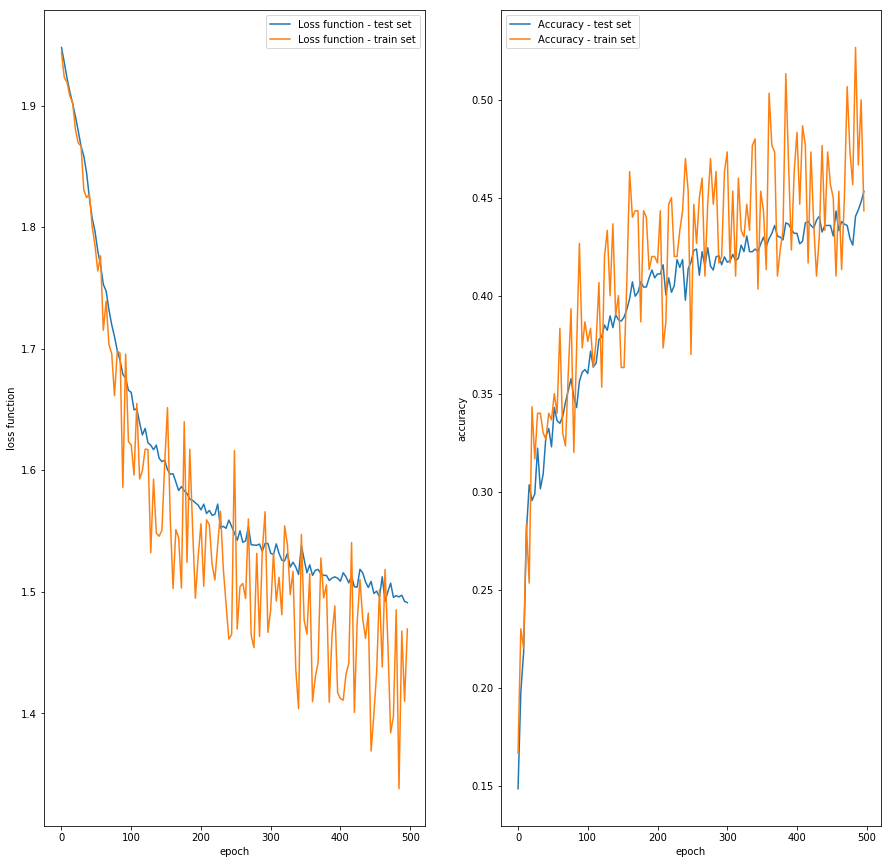

In [591]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
x = np.arange(0, EPOCHS+DISPLAY_STEP-4, DISPLAY_STEP)

axs[0].plot(x, test_losses, label = 'Loss function - test set')
axs[0].plot(x, train_losses, label = 'Loss function - train set')

axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss function')
axs[0].legend()  

axs[1].plot(x, test_accuracies, label = 'Accuracy - test set')
axs[1].plot(x, train_accuracies, label = 'Accuracy - train set')

axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()

plt.show()

## Validate

In [537]:
import json
def read_tweets_v2(file_name):
    tweets = []
    file = open(file_name, 'r', encoding="utf8") 
    for line in file:
        try:
            tweet = json.loads(line)
            tweets.append(tweet['tweet'])
            
        except:
            continue
    return tweets

In [541]:
tweets = read_tweets_v2('trump.json')

In [542]:
for i in tweets:
    print(i+'\n')

Great job being done by Congressman Keith Rothfus of Pennsylvania. Thank you Keith!

In Florida there is a choice between a Harvard/Yale educated man named @RonDeSantisFL who has been a great Congressman and will be a great Governor - and a Dem who is a thief and who is Mayor of poorly run Tallahassee, said to be one of the most corrupt cities in the Country!

Many Gang Members and some very bad people are mixed into the Caravan heading to our Southern Border. Please go back, you will not be admitted into the United States unless you go through the legal process. This is an invasion of our Country and our Military is waiting for you!

Had a very good conversation with the newly elected President of Brazil, Jair Bolsonaro, who won his race by a substantial margin. We agreed that Brazil and the United States will work closely together on Trade, Military and everything else! Excellent call, wished him congrats!

....of Anger and Outrage and we will then be able to bring all sides together

In [543]:
X_tweet_vec = all_sentenses2vec(tweets, word_representation)

In [549]:
X_tweet_vec.shape

(40, 50)

In [551]:
# Initializing the variables
init = tf.global_variables_initializer()

train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

DISPLAY_STEP = 4
EPOCHS = 500
BATCH_SIZE = 300
keep = 0.8

with tf.Session() as sess:
    sess.run(init)
    
    #create first set of mini-batches
    mini_batches = random_mini_batches(X_train_vec, Y_train, mini_batch_size = BATCH_SIZE, seed = 0)
    
    for i in range(EPOCHS):
        mini_batches, batch_X, batch_Y = next_batch_v2(i, mini_batches, X_train_vec, Y_train, BATCH_SIZE)
        
        sess.run(optimizer, feed_dict={X: batch_X, Y_true: batch_Y, keep_prob: keep})
        
        if i % DISPLAY_STEP == 0:
            acc_train, loss_train = sess.run([accuracy, loss_function], feed_dict={X: batch_X, Y_true: batch_Y, keep_prob: 1})
            tweets_predicted_labels = sess.run([predicted_labels], feed_dict={X: X_tweet_vec, keep_prob: 1})

            print("#{} Train loss={}, Train acc={} , Test loss={}, Test acc={}".format(i,loss_train,acc_train, loss_test, acc_test))

            train_losses.append(loss_train)
            train_accuracies.append(acc_train)
     
    # prepare data for confusion matrix
    pred_labels = sess.run([predicted_labels], feed_dict={X: X_tweet_vec, keep_prob:1})

#0 Train loss=1.9602586030960083, Train acc=0.1133333370089531 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#4 Train loss=1.9259669780731201, Train acc=0.20333333313465118 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#8 Train loss=1.9298584461212158, Train acc=0.20000000298023224 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#12 Train loss=1.914913296699524, Train acc=0.18000000715255737 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#16 Train loss=1.9084023237228394, Train acc=0.24666666984558105 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#20 Train loss=1.8890305757522583, Train acc=0.2966666519641876 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#24 Train loss=1.8741827011108398, Train acc=0.31333333253860474 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#28 Train loss=1.86790931224823, Train acc=0.30666667222976685 , Test loss=1.4899190664291382, Test acc=0.43382352590560913


#264 Train loss=1.481396198272705, Train acc=0.49000000953674316 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#268 Train loss=1.542327880859375, Train acc=0.4033333361148834 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#272 Train loss=1.468483567237854, Train acc=0.4399999976158142 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#276 Train loss=1.456695795059204, Train acc=0.4399999976158142 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#280 Train loss=1.5402185916900635, Train acc=0.4300000071525574 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#284 Train loss=1.4486562013626099, Train acc=0.4566666781902313 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#288 Train loss=1.5159279108047485, Train acc=0.44333332777023315 , Test loss=1.4899190664291382, Test acc=0.43382352590560913
#292 Train loss=1.5540019273757935, Train acc=0.4000000059604645 , Test loss=1.4899190664291382, Test acc=0.433823525905

In [552]:
pred_labels

[array([2, 4, 4, 0, 3, 2, 3, 1, 6, 2, 0, 1, 1, 2, 2, 1, 0, 2, 3, 2, 2, 2,
        1, 0, 6, 0, 1, 0, 0, 2, 1, 4, 3, 2, 1, 4, 3, 4, 4, 0], dtype=int64)]